In [1]:
!pip install numpy
!pip install -U scipy==1.2.0
!pip install matplotlib
!pip install Pillow

     |████████████████████████████████| 26.6MB 165kB/s 
ERROR: umap-learn 0.4.4 has requirement scipy>=1.3.1, but you'll have scipy 1.2.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.2.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import os
import requests
import numpy as np
from scipy.misc import imsave,imread
import matplotlib.pyplot as plt
from flask import Flask,request,jsonify

In [7]:
from google.colab import files
uploaded = files.upload()

Saving pre_trained.h5 to pre_trained.h5
Saving pre_trained.json to pre_trained (1).json


In [8]:
with open('pre_trained.json','r') as f:
  model_json = f.read()
model = tf.keras.models.model_from_json(model_json)

In [9]:
model.load_weights("pre_trained.h5")

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
import socket
import threading

print(socket.gethostbyname(socket.getfqdn(socket.gethostname())))

app=Flask(__name__)
@app.route('/api/ml/<string:img>',methods=['POST'])

def classify_img(img):
  upload = '/content/'
  image = imread(upload+img)
  classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
  prediction = model.predict([image.reshape(-1,28*28)])
  
  return jsonify({'object_detect':classes[np.argmax(prediction[0])]})


threading.Thread(target=app.run, kwargs={'host':'0.0.0.0','port':5000}).start()  

172.28.0.2
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)


In [12]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
for i in range(3):
  imsave(name='/content/{}.png'.format(i),arr=x_test[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


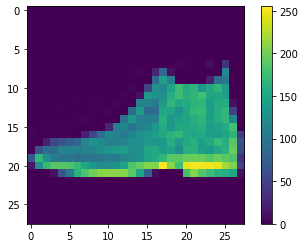

In [14]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)

In [15]:
import requests
r = requests.post("http://172.28.0.2:5000/api/ml/0.png")
print(r.text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
172.28.0.2 - - [30/Jun/2020 16:49:19] "POST /api/ml/0.png HTTP/1.1" 200 -


{"object_detect":"Ankle boot"}



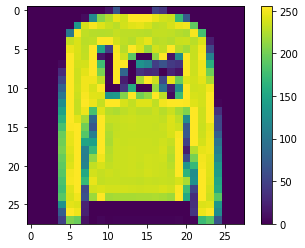

In [16]:
plt.figure()
plt.imshow(x_test[1])
plt.colorbar()
plt.grid(False)

In [17]:
import requests
r = requests.post("http://172.28.0.2:5000/api/ml/1.png")
print(r.text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
172.28.0.2 - - [30/Jun/2020 16:49:22] "POST /api/ml/1.png HTTP/1.1" 200 -


{"object_detect":"Pullover"}



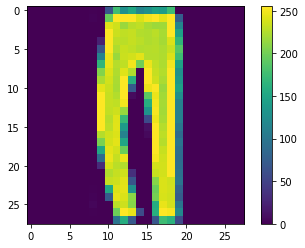

In [18]:
plt.figure()
plt.imshow(x_test[2])
plt.colorbar()
plt.grid(False)